In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
train_data=pd.read_csv('/content/drive/My Drive/datasets/deep learning/ANN/stock market pred/Google_Stock_Price_Train.csv')

In [10]:
train_set=train_data['Open']
train_set=train_set.values.reshape((-1,1))

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train_set=sc.fit_transform(train_set)

In [12]:
train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
x_train=train_set[0:1257]
y_train=train_set[1:1258]

In [14]:
x_train=np.reshape(x_train,(1257,1,1))

In [21]:
model=Sequential()
model.add(LSTM(units=8,activation='sigmoid',input_shape=(None,1)))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s 279us/step - loss: 0.2067
Epoch 2/200
1257/1257 [==============================] - 0s 45us/step - loss: 0.1234
Epoch 3/200
1257/1257 [==============================] - 0s 49us/step - loss: 0.0889
Epoch 4/200
1257/1257 [==============================] - 0s 47us/step - loss: 0.0778
Epoch 5/200
1257/1257 [==============================] - 0s 51us/step - loss: 0.0740
Epoch 6/200
1257/1257 [==============================] - 0s 49us/step - loss: 0.0717
Epoch 7/200
1257/1257 [==============================] - 0s 58us/step - loss: 0.0697
Epoch 8/200
1257/1257 [==============================] - 0s 59us/step - loss: 0.0675
Epoch 9/200
1257/1257 [==============================] - 0s 50us/step - loss: 0.0653
Epoch 10/200
1257/1257 [==============================] - 0s 50us/step - loss: 0.0630
Epoch 11/200
1257/1257 [==============================] - 0s 47us/step - loss: 0.0608
Epoch 12/200
1257/1257 [==============================] - 0s 5

In [22]:
test_data=pd.read_csv('/content/drive/My Drive/datasets/deep learning/ANN/stock market pred/Google_Stock_Price_Test.csv')

In [23]:
test_set=test_data['Open']
test_set=test_set.values.reshape((-1,1))

In [25]:
inputs=test_set
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(20,1,1))
pred_val=model.predict(inputs)

In [26]:
pred_val

array([[0.9265482 ],
       [0.9430117 ],
       [0.9390908 ],
       [0.95484227],
       [0.97382504],
       [0.97630197],
       [0.9714474 ],
       [0.9750808 ],
       [0.9756575 ],
       [0.974979  ],
       [0.97282344],
       [0.9716514 ],
       [0.9746906 ],
       [0.97526735],
       [1.0006613 ],
       [1.0129118 ],
       [1.0265386 ],
       [1.0213906 ],
       [0.98780483],
       [0.95757765]], dtype=float32)

In [28]:
pred_val=sc.inverse_transform(pred_val)
pred_val

array([[418068.2 ],
       [422825.66],
       [421692.62],
       [426244.38],
       [431729.8 ],
       [432445.6 ],
       [431042.78],
       [432092.7 ],
       [432259.38],
       [432063.28],
       [431440.4 ],
       [431101.7 ],
       [431979.97],
       [432146.6 ],
       [439484.7 ],
       [443024.75],
       [446962.47],
       [445474.88],
       [435769.6 ],
       [427034.78]], dtype=float32)

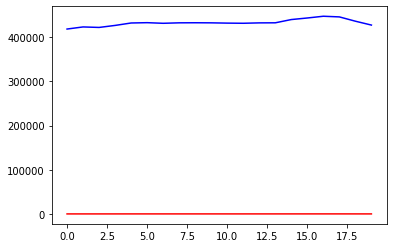

In [29]:
plt.plot(test_set,color='red',label='red is real')
plt.plot(pred_val,color='blue',label='blue is predicted')